In [13]:
import keras

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
from pandas import DataFrame

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

print("Hello World!")

Hello World!


In [2]:
#generate 2d classification dataset
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, cluster_std = 2, random_state = 12)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 2)
y shape: (1000,)


In [3]:
df = DataFrame(dict(x = X[:,0], y = X[:,1], label = y))
print("df shape:", df.shape)
print(df.head(10))

df shape: (1000, 3)
   label          x         y
0      2  -9.881290  7.650684
1      1  -4.982278 -2.185440
2      1  -7.009262 -0.300617
3      0  -7.307066  2.549532
4      1  -6.428548  2.780214
5      0  -9.238519  3.642337
6      2  -9.677688  7.539180
7      2 -12.965938  7.869441
8      2  -9.845221  8.240644
9      1  -6.958782  5.099353


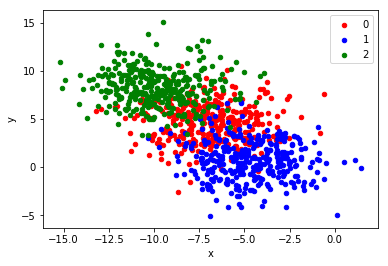

In [4]:
colors = {0:"red", 1:"blue", 2:"green"}
fig,ax = pyplot.subplots()
grouped = df.groupby("label")
for key, group in grouped:
    group.plot(ax=ax, kind = "scatter", x = 'x', y = 'y', label = key, color = colors[key])
pyplot.show()

In [5]:
#single multiplayer perceptron model

In [6]:
#one hot encoding
y = to_categorical(y)

#split train and test
n_train = int(0.9 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train, :], y[n_train:, :]
print("trainX, testX, trainy, testy shape:", trainX.shape, testX.shape, trainy.shape, testy.shape)


trainX, testX, trainy, testy shape: (900, 2) (100, 2) (900, 3) (100, 3)


In [7]:
#define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [8]:
#train model
history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 50, verbose = 1)

Train on 900 samples, validate on 100 samples
Epoch 1/50
900/900 [==============================] - 0s - loss: 0.9577 - acc: 0.4989 - val_loss: 0.8547 - val_acc: 0.6800
Epoch 2/50
900/900 [==============================] - 0s - loss: 0.8581 - acc: 0.5844 - val_loss: 0.7901 - val_acc: 0.6700
Epoch 3/50
900/900 [==============================] - 0s - loss: 0.8057 - acc: 0.6133 - val_loss: 0.7628 - val_acc: 0.6500
Epoch 4/50
900/900 [==============================] - 0s - loss: 0.7735 - acc: 0.6178 - val_loss: 0.7630 - val_acc: 0.6800
Epoch 5/50
900/900 [==============================] - 0s - loss: 0.7508 - acc: 0.6322 - val_loss: 0.7231 - val_acc: 0.6900
Epoch 6/50
900/900 [==============================] - 0s - loss: 0.7281 - acc: 0.6422 - val_loss: 0.7186 - val_acc: 0.6900
Epoch 7/50
900/900 [==============================] - 0s - loss: 0.7070 - acc: 0.6656 - val_loss: 0.6932 - val_acc: 0.7100
Epoch 8/50
900/900 [==============================] - 0s - loss: 0.6940 - acc: 0.6789 - val_l

In [10]:
#evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print("Train {:.3}, test {:.3}".format(train_acc, test_acc))

Train 0.811, test 0.8


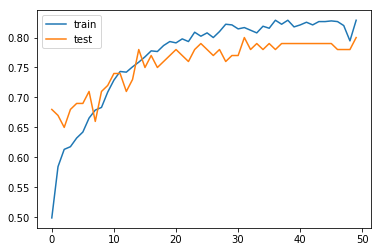

In [11]:
#learning curves of model accuracy
#print(history.history.keys())  #dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
pyplot.plot(history.history["acc"], label="train")
pyplot.plot(history.history["val_acc"], label="test")
pyplot.legend()
pyplot.show()

In [23]:
#evaluate a single mlp model.
#basically train a model on a training set, test on a testing set, and then return
#the model itself so that it can be used for bagging.

def evaluate_model(trainX, trainy, testX, testy):
    #encode targets
    trainy_enc = to_categorical(trainy)
    testy_enc = to_categorical(testy)
    
    #define model
    model = Sequential()
    model.add(Dense(50, input_dim = 2, activation = "relu"))
    model.add(Dense(3, activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    #fit model
    model.fit(trainX, trainy_enc, epochs = 50, verbose = 0)
    
    #evaluate model
    _, test_acc = model.evaluate(testX, testy_enc, verbose = 0)
    
    return model, test_acc

#make an ensemble prediction from multi-class classification
def ensemble_predictions(members, testX):
    #make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    
    #sum accross ensemble members
    summed = numpy.sum(yhats, axis = 0)
    
    #argmax across classes
    result = argmax(summed, axis = 1)
    
    return result
    
#evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    #select a subset of members
    subset = members[:n_members]
    #make predictions
    yhat = ensemble_predictions(subset, testX)
    #calculate accuracy
    return accuracy_score(testy, yhat)

    

In [24]:
#generate 2nd classification dataset
dataX,datay = make_blobs(n_samples = 55000, centers = 3, n_features = 2, cluster_std = 2, random_state = 12)
X, newX = dataX[:5000, :], dataX[5000: , :]
y, newy = datay[:5000], datay[5000:]
print("X, newX, y, newy shape:", X.shape, newX.shape, y.shape, newy.shape)


X, newX, y, newy shape: (5000, 2) (50000, 2) (5000,) (50000,)


In [25]:
#multiple train-test splits
n_splits = 10
scores, members = [], []
for _ in range(n_splits):
    #split data
    trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.1)
    #evaluate model
    model, test_acc  = evaluate_model(trainX, trainy, testX, testy)
    print("{:.3f}".format(test_acc))
    scores.append(test_acc)
    members.append(model)
    
#summarize expected performance
print("Estimated accuracy: mean {:.3f} std: {:.3f}".format(mean(scores), std(scores)))

0.850
0.814
0.836
0.862
0.846
0.838
0.814
0.854
0.832
0.834
Estimated accuracy: mean 0.838 std: 0.015


In [26]:
#evaluate different number of ensembles on holdout set

#so we trained the models with random 90% split of the first 5K data, 
#and evaluating on the next 50K.

single_scores, ensemble_scores = [], []
for i in range(1, n_splits+1):
    ensemble_score = evaluate_n_members(members, i, newX, newy)
    newy_enc = to_categorical(newy)
    _, single_score = members[i-1].evaluate(newX, newy_enc, verbose = 0)
    print("i {} : single: {:.3f} ensemble: {:.3f}".format(i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)

print("Accuracy: mean {:.3f} std {:.3f}".format(mean(single_scores), std(single_scores)))

i 1 : single: 0.832 ensemble: 0.832
i 2 : single: 0.832 ensemble: 0.832
i 3 : single: 0.831 ensemble: 0.832
i 4 : single: 0.833 ensemble: 0.832
i 5 : single: 0.831 ensemble: 0.833
i 6 : single: 0.832 ensemble: 0.834
i 7 : single: 0.827 ensemble: 0.833
i 8 : single: 0.833 ensemble: 0.833
i 9 : single: 0.832 ensemble: 0.833
i 10 : single: 0.831 ensemble: 0.833
Accuracy: mean 0.831 std 0.002


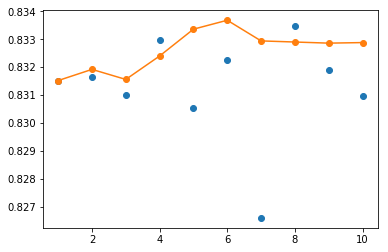

In [29]:
#plot score vs number of ensemble numbers
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker = "o", linestyle = "None")
pyplot.plot(x_axis, ensemble_scores, marker = "o")
pyplot.show()